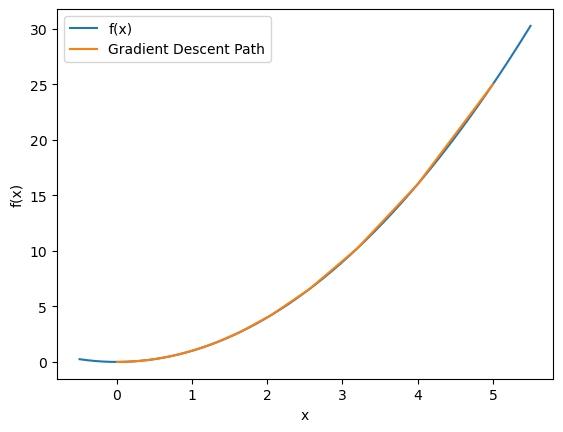

Minimum of f(x) = x^2: x = 0.005, f(x) = 0.0


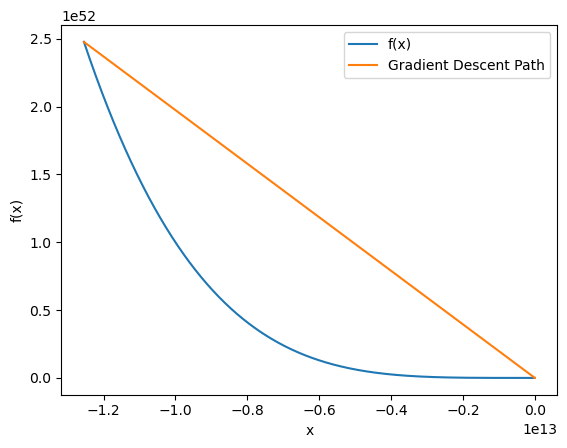

Minimum of f(x) = x^4 - 2x^2: x = -12543999968256.729, f(x) = 2.475963151232574e+52


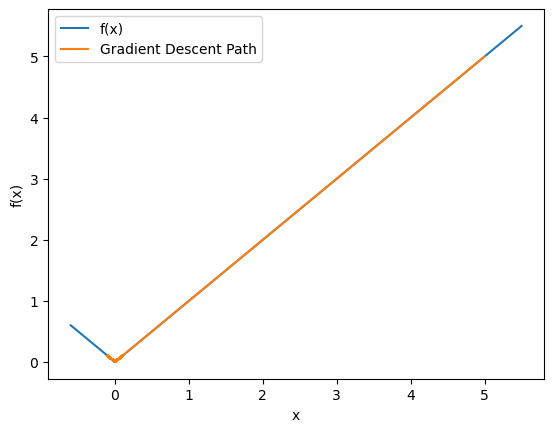

Minimum of f(x) = |x|: x = -0.0, f(x) = 0.0


In [18]:
import matplotlib.pyplot as plt
import numpy as np

def gradient_descent(f, learning_rate, initial_point):
    def deriv(f, base_point):  # estimate the derivative of the function f at base_point using the symmetric approx
        return (f(base_point + 10**(-10)) - f(base_point - 10**(-10))) / (2 * 10**(-10))
    
    x_coords = [initial_point]  # This list is where you will store the x_n's
    y_coords = [f(initial_point)]  # This list is where you will store the y_n's

    current_point = initial_point
    steps = 0
    max_steps = 10000  # Maximum steps to prevent infinite loop
    tolerance = 0.01  # Tolerance to stop if gradient is close to zero

    while steps < max_steps:
        gradient = deriv(f, current_point)
        if abs(gradient) < tolerance:
            break
        current_point = current_point - learning_rate * gradient
        x_coords.append(current_point)
        y_coords.append(f(current_point))
        steps += 1

    # Plotting portion. You may adjust as you please.
    plot_range = np.linspace(min(x_coords) - 0.5, max(x_coords) + 0.5, 1000)  # a nice plot range to make look good
    function_range = [f(i) for i in plot_range]
    plt.plot(plot_range, function_range, label="f(x)")  # this plots the function f(x)
    plt.plot(x_coords, y_coords, label="Gradient Descent Path")  # This will plot the sequence of points x_n, f(x_n)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

    return round(x_coords[-1], 3), round(y_coords[-1], 3)  # returns your last x_n and y_n, rounded to three decimal places.

# Function 1: f(x) = x^2
def f1(x):
    return x**2

# Function 2: f(x) = x^4 - 2x^2
def f2(x):
    return x**4 - 2*x**2

# Function 3: f(x) = |x| (this will not work well with gradient descent)
def f3(x):
    return abs(x)

# Example usage of gradient descent for different functions

# Function 1: f(x) = x^2
final_x1, final_y1 = gradient_descent(f1, learning_rate=0.1, initial_point=5)
print(f"Minimum of f(x) = x^2: x = {final_x1}, f(x) = {final_y1}")

# Function 2: f(x) = x^4 - 2x^2
final_x2, final_y2 = gradient_descent(f2, learning_rate=0.1, initial_point=5)
print(f"Minimum of f(x) = x^4 - 2x^2: x = {final_x2}, f(x) = {final_y2}")

# Function 3: f(x) = |x| (Gradient descent doesn't work well here)
final_x3, final_y3 = gradient_descent(f3, learning_rate=0.1, initial_point=5)
print(f"Minimum of f(x) = |x|: x = {final_x3}, f(x) = {final_y3}")
